# Chapter 15 — 15_04: Time Series & Simple Linear Regression

We reproduce the textbook’s NYC January temperature trend example using scikit-learn’s `LinearRegression`.


In [25]:
import pandas as pd

# Use the CSV you copied into your project:
# datafun-07-ml/examples/ch15/ave_hi_nyc_jan_1895-2018.csv
nyc = pd.read_csv('examples/ch15/ave_hi_nyc_jan_1895-2018.csv')

nyc.columns = ['Date', 'Temperature', 'Anomaly']
nyc.Date = nyc.Date.floordiv(100)  # convert YYYYMM -> YYYY
nyc.head(3)


,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(
    nyc.Date.values.reshape(-1, 1),
    nyc.Temperature.values,
    random_state=11
)

linear_regression = LinearRegression()
linear_regression.fit(X=X_train, y=y_train)

print("Coefficient (slope):", linear_regression.coef_[0])
print("Intercept:", linear_regression.intercept_)


Coefficient (slope): 0.019391673294782773
Intercept: -0.30779820252656975


In [27]:
predicted = linear_regression.predict(X_test)
expected  = y_test

for p, e in zip(predicted[::5], expected[::5]):
    print(f'predicted: {p:.2f}, expected: {e:.2f}')


predicted: 37.86, expected: 31.70
predicted: 38.69, expected: 34.80
predicted: 37.00, expected: 39.40
predicted: 37.25, expected: 45.70
predicted: 38.05, expected: 32.30
predicted: 37.64, expected: 33.80
predicted: 36.94, expected: 39.70


In [28]:
predict = lambda x: linear_regression.coef_ * x + linear_regression.intercept_

print("Predicted 2019:", predict(2019))
print("Predicted 1890:", predict(1890))
print("Self-check 1889:", predict(1889))
print("Self-check 2020:", predict(2020))


Predicted 2019: [38.84399018]
Predicted 1890: [36.34246432]
Self-check 1889: [36.32307265]
Self-check 2020: [38.86338185]


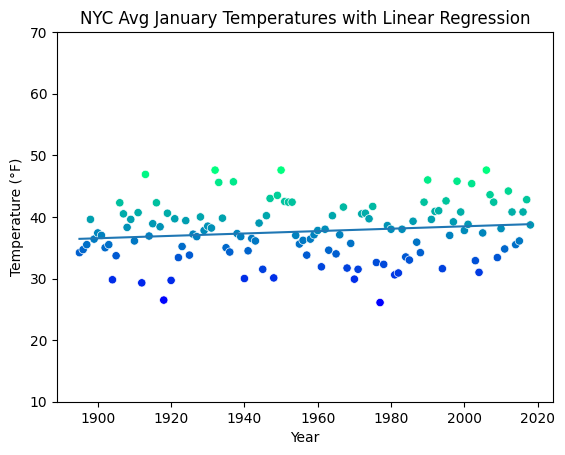

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

axes = sns.scatterplot(
    data=nyc, x='Date', y='Temperature',
    hue='Temperature', palette='winter', legend=False
)
axes.set_ylim(10, 70)

x = np.array([nyc.Date.min(), nyc.Date.max()])
y = predict(x)

plt.plot(x, y)  # regression line
plt.title("NYC Avg January Temperatures with Linear Regression")
plt.xlabel("Year"); plt.ylabel("Temperature (°F)")
plt.show()


## Example 2 — Unsupervised Machine Learning: Dimensionality Reduction with t-SNE (15_06.py)

In this example, we explore **unsupervised learning** using **t-SNE (t-Distributed Stochastic Neighbor Embedding)** to reduce the 
high-dimensional handwritten digits dataset (from scikit-learn) into **two dimensions** for visualization.  

Unlike regression or classification, **unsupervised learning** finds structure or patterns in data without using predefined labels 
during training. After dimensionality reduction, we can visualize clusters that roughly correspond to different digits.


In [30]:
from sklearn.datasets import load_digits
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

# Load digits: 1797 samples, 64 features (8x8 images flattened)
digits = load_digits()
X, y = digits.data, digits.target

print("X shape:", X.shape, "| y shape:", y.shape)


X shape: (1797, 64) | y shape: (1797,)


### Fit t-SNE to produce a 2D embedding
We use settings that work well with recent scikit-learn versions and provide stable-ish results.


In [31]:
from sklearn.datasets import load_digits
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

# Load digits: 1797 samples, 64 features (8x8 images flattened)
digits = load_digits()
X, y = digits.data, digits.target

# Create and fit t-SNE estimator (no n_iter argument)
tsne = TSNE(
    n_components=2,
    random_state=11,
    init="pca",
    learning_rate="auto",
    perplexity=30
)
reduced = tsne.fit_transform(X)
reduced.shape



(1797, 2)

### Unlabeled scatter of the 2D embedding
This shows the geometric structure discovered by t-SNE without using labels.


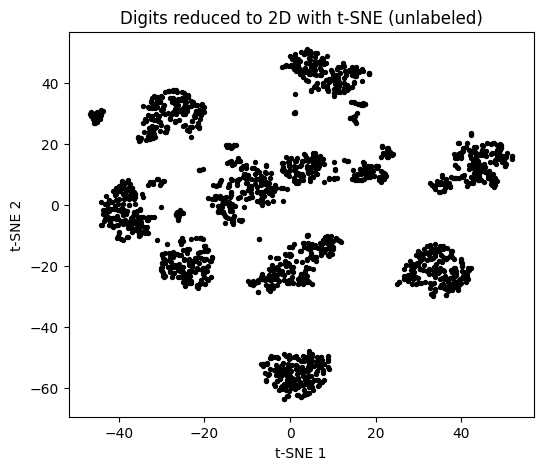

In [32]:
plt.figure(figsize=(6,5))
plt.scatter(reduced[:, 0], reduced[:, 1], s=8, c="black")
plt.title("Digits reduced to 2D with t-SNE (unlabeled)")
plt.xlabel("t-SNE 1"); plt.ylabel("t-SNE 2")
plt.show()


### Colored by true labels (for inspection only)
Labels are used **only for coloring** to assess cluster separation after the unsupervised fit.


C:\Users\brend\AppData\Local\Temp\ipykernel_33452\3243952976.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  c=y, cmap=plt.cm.get_cmap("nipy_spectral_r", 10)


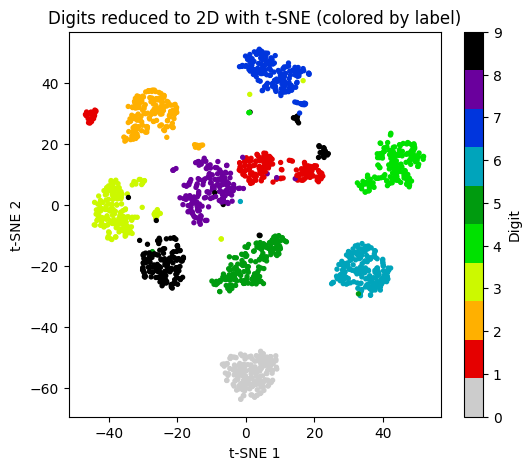

In [33]:
plt.figure(figsize=(6,5))
scatter = plt.scatter(
    reduced[:, 0], reduced[:, 1], s=8,
    c=y, cmap=plt.cm.get_cmap("nipy_spectral_r", 10)
)
cbar = plt.colorbar(scatter, ticks=np.arange(10))
cbar.set_label("Digit")
plt.title("Digits reduced to 2D with t-SNE (colored by label)")
plt.xlabel("t-SNE 1"); plt.ylabel("t-SNE 2")
plt.show()
